# stage3  Scikit-learn으로 Linear Regression 구현하기
## 1. Data set 구성하기
- 모든 데이터를 8:2로 나누고 8 부분을 다시 8:2로 나누어, training set, validation set, test set을 구성
- 총 21,613개 데이터 
![ㅇㄹ](https://gblobscdn.gitbook.com/assets%2F-LeR-GoH6BL7vjJGC8as%2F-LeR-Xs49WNTJmZIKLYU%2F-LeR-_0g4XbzenTBmh2H%2Fimage%20(280).png?alt=media)

In [1]:
import pandas as pd

df = pd.read_csv('data/house.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2]:
# 필요없는 열 drop
house_data = df.drop(['id', 'date'], axis = 1)
house_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


###  sklearn.model_selection의 train_test_split

In [8]:
from sklearn.model_selection import train_test_split

# input: 나머지, target: 가격
train_data = house_data.drop(['price'], axis = 1)
target_data = house_data['price']

# train : test set을 8:2로 나눠주기
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.2) # 지정 안하면 75:25

# 다시 train set을 8:2로 나눠서 validation set 만들기 
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)

print('모든 데이터', train_data.shape)  # count() 말고 shape
print('train set', x_train.shape, y_train.shape)
print('valid set', x_valid.shape, y_valid.shape)
print('test set', x_test.shape, y_test.shape)
# 18 -> train data의 열의 수(input)

모든 데이터 (21613, 18)
train set (13832, 18) (13832,)
valid set (3458, 18) (3458,)
test set (4323, 18) (4323,)


### cf 데이터 수 알아보는 방법: count() 또는 shape

## 2. scikit-learn으로 모델 구현 & 성능 평가

### 1) Linear Regression -> sklearn.linear_model의 LinearRegression

- **학습:   .fit( , )**
- **점수:   .score( , )**

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train) # 학습 .fit( , )

print('train set score', lr.score(x_train, y_train)) # 점수 .score( , )
print('valid set score', lr.score(x_valid, y_valid))

train set score 0.6951941235875081
valid set score 0.7054575717918825


### 2) Polynomial Regression -> sklearn.preprocessing의 PolynomialFeatures


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), 
                     LinearRegression())

model.fit(x_train, y_train) # 학습

print('train set score', model.score(x_train, y_train)) # 성능 평가 .score( , )
print('valid set score', model.score(x_valid, y_valid))

train set score 0.829585694068182
valid set score 0.8062830203867876


### 3) Polynomial Features가 3인 모델 만들기(미션1)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model3 = make_pipeline(PolynomialFeatures(3), 
                     LinearRegression())

model3.fit(x_train, y_train) # 학습

print('train set score', model3.score(x_train, y_train)) # 성능 평가 .score( , )
print('valid set score', model3.score(x_valid, y_valid))

train set score 0.8675768519212743
valid set score 0.12459496012249038


### 4) 특정 조건의 집값 예측해보기(자율1)

### 5) Decision Tree Regressor (자율2) -> sklearn.tree의 DecisionTreeRegressor


In [13]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(x_train, y_train)

print('train set score: ', tree.score(x_train, y_train))
print('valid set score: ', tree.score(x_valid, y_valid))

train set score:  0.9993780887570167
valid set score:  0.7115428091072696


### 6) 여러 모델을 그래프로 표현하기


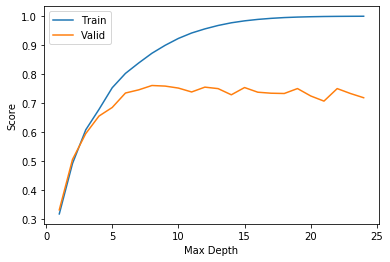

In [15]:
import matplotlib.pyplot as plt

train_score = []
valid_score = []
depth_range = range(1, 25)
for depth in depth_range: 
    tree = DecisionTreeRegressor(max_depth = depth).fit(x_train, y_train)
    train_score.append(tree.score(x_train, y_train))
    valid_score.append(tree.score(x_valid, y_valid))
plt.plot(depth_range, train_score)
plt.plot(depth_range, valid_score)

plt.legend(['Train', 'Valid'])

plt.xlabel('Max Depth')
plt.ylabel('Score')

plt.show()